## EDA_Retails (Task)

## Amartya Basu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


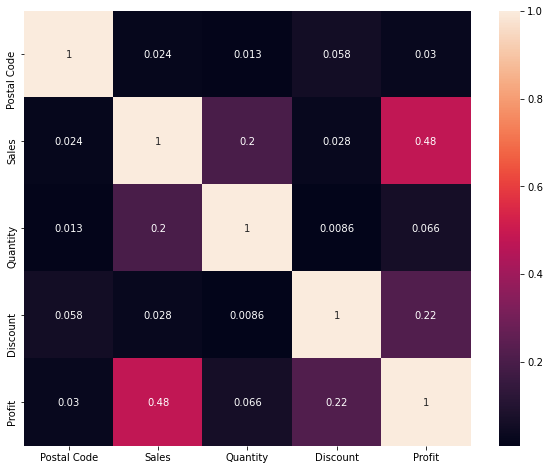

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().abs(), annot=True)

Remark:

1. Sales and profit have good data correlation value. 
2. Quantity has very weak data correlation with Profit.

### Dist Plots

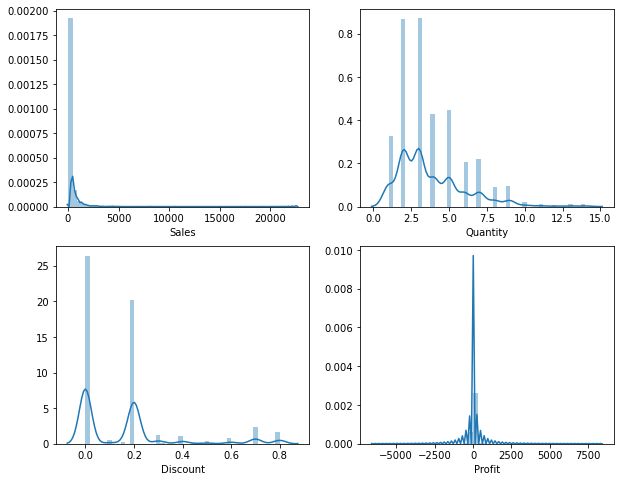

In [7]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.distplot(data.Sales)
plt.subplot(2, 2, 2)
sns.distplot(data.Quantity)
plt.subplot(2, 2, 3)
sns.distplot(data.Discount)
plt.subplot(2, 2, 4)
sns.distplot(data.Profit)

> Above distribution plots of data clearly shows that, only "Profit" data is normal data, that has bell-shaped distribution curve.

### Histogram Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBFFD42908>,
      dtype=object)

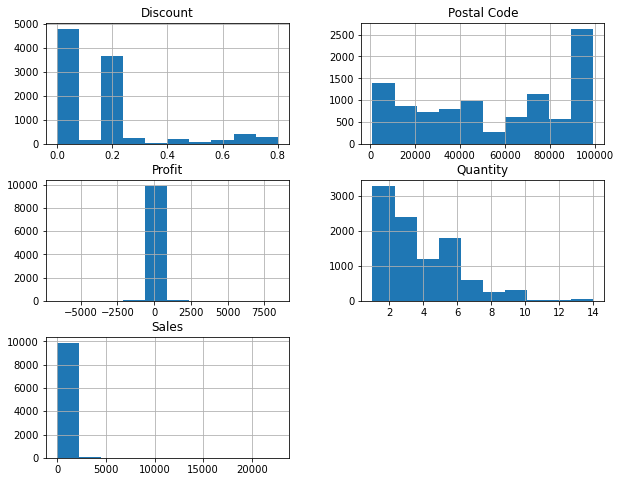

In [8]:
data.hist(figsize=(10, 8))

### Ship mode analysis

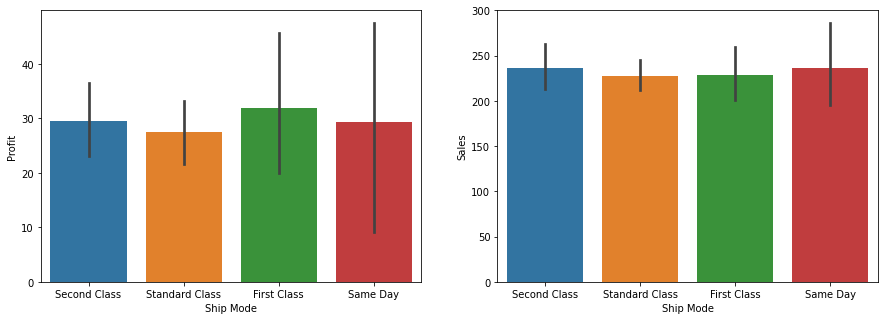

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Ship Mode', y='Profit', data=data)
plt.subplot(1, 2, 2)
sns.barplot(x='Ship Mode', y='Sales', data=data)

Remark:

Ship mode doesn't effect Sales and Profit data.

### Segement analysis

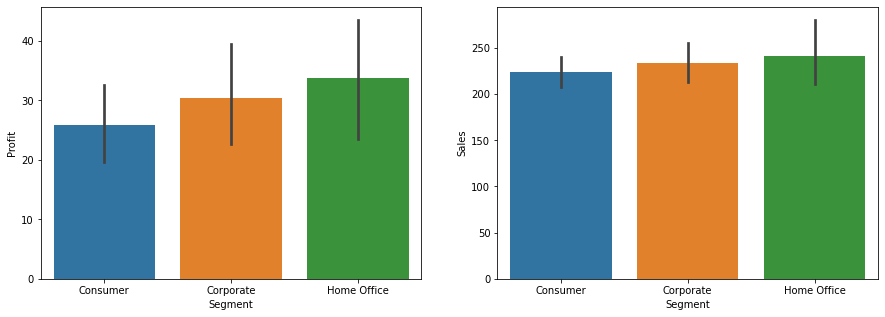

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Segment', y='Profit', data=data)
plt.subplot(1, 2, 2)
sns.barplot(x='Segment', y='Sales', data=data)

Remark:

1. Profit and Sales gradually increases with respect to Consumers, Corporate and Home Office segment regardingly.
2. Home Office gives maximum Profit and Sales.

### Which city gives maximum Sales and Profit?

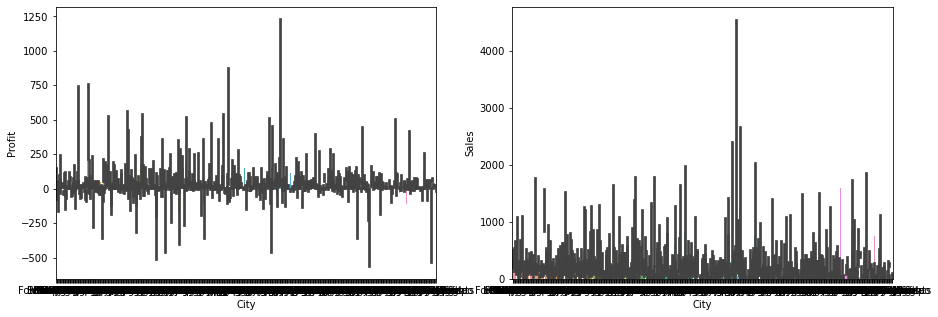

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='City', y='Profit', data=data)
plt.subplot(1, 2, 2)
sns.barplot(x='City', y='Sales', data=data)

In [12]:
d1 = data.groupby(['City'], sort=True).sum()
d1

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Aberdeen,57401,25.500,3,0.0,6.6300
Abilene,79605,1.392,2,0.8,-3.7584
Akron,930552,2729.986,65,7.5,-186.6356
Albuquerque,1219470,2220.160,65,0.8,634.0881
Alexandria,356864,5519.570,84,0.0,318.6183
...,...,...,...,...,...
Woonsocket,11580,195.550,15,0.0,78.6791
Yonkers,160515,7657.666,57,1.0,2767.7557
York,87015,817.978,19,2.1,-102.1692


In [13]:
d1 = d1[['Sales', 'Profit']]
d1.sort_values(by='Profit', ascending=False).head(10)

,Sales,Profit
City,,
New York City,256368.161,62036.9837
Los Angeles,175851.341,30440.7579
Seattle,119540.742,29156.0967
San Francisco,112669.092,17507.3854
Detroit,42446.944,13181.7908
Lafayette,25036.200,10018.3876
Jackson,24963.858,7581.6828
Atlanta,17197.840,6993.6629
Minneapolis,16870.540,6824.5846


Remark:

1. New York City gives maximum sales and profits.

### Which state gives maximum Sales and Profit?

In [14]:
d2 = data.groupby(['State'], sort=True).sum()
d2 = d2[['Sales', 'Profit']]
d2.sort_values(by='Profit', ascending=False).head(10)

,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504
Indiana,53555.3600,18382.9363
Georgia,49095.8400,16250.0433
Kentucky,36591.7500,11199.6966
Minnesota,29863.1500,10823.1874


Remark:

1. State California gives maximum sales and profits.

### Which part of Country fetches max profit?

In [15]:
d3 = data[['Region', 'Sales', 'Profit']].groupby(['Region'], sort=True).sum()
d3

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


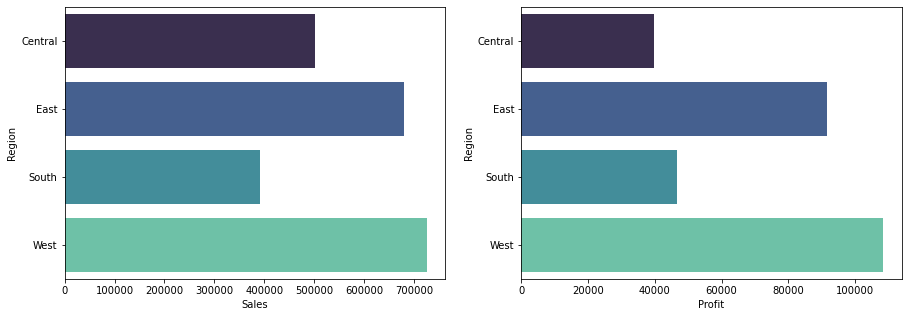

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(y=d3.index, x='Sales', data=d3, palette='mako')
plt.subplot(1, 2, 2)
sns.barplot(y=d3.index, x='Profit', data=d3, palette='mako')

Remark:

1. West Region gives maximum sales and profits.

### Category & Sub-category analysis

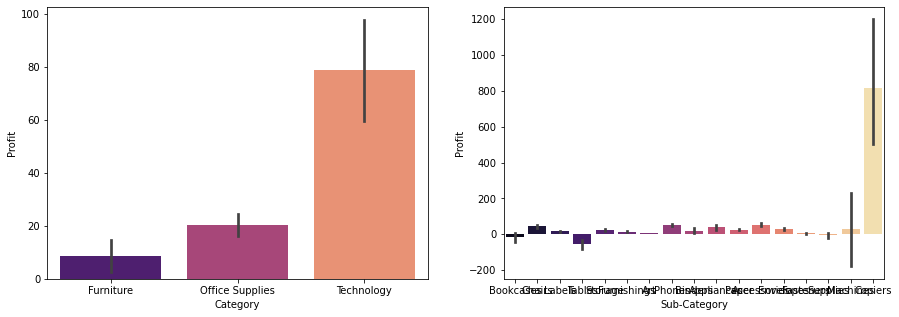

In [44]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='Category', y='Profit', data=data,palette='magma')
plt.subplot(1, 2, 2)
sns.barplot(x='Sub-Category', y='Profit', data=data,palette='magma')

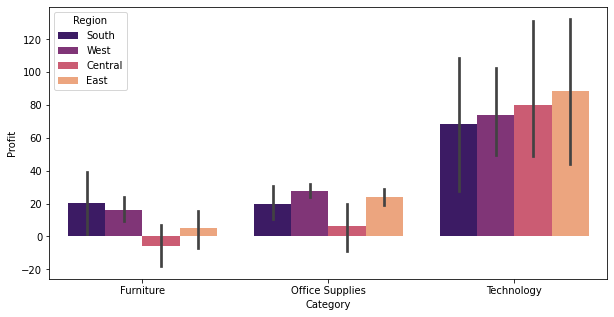

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Profit', hue='Region', data=data,palette='magma')

## All remarks:

1. Sales and profit have good data correlation value. 
2. Quantity has very weak data correlation with Profit.
3. Only "Profit" data is normal data, that has bell-shaped distribution curve.
4. Ship mode doesn't effect Sales and Profit data.
5. Profit and Sales gradually increases with respect to Consumers, Corporate and Home Office segment regardingly.
6. Home Office gives maximum Profit and Sales.
7. New York City gives maximum sales and profits.
8. State California gives maximum sales and profits.
9. West Region gives maximum sales and profits.